<a href="https://colab.research.google.com/github/berkecanalan/fuel_regression/blob/main/fuel_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

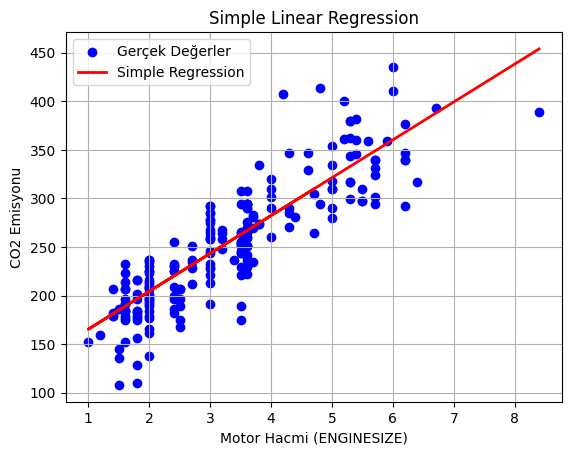

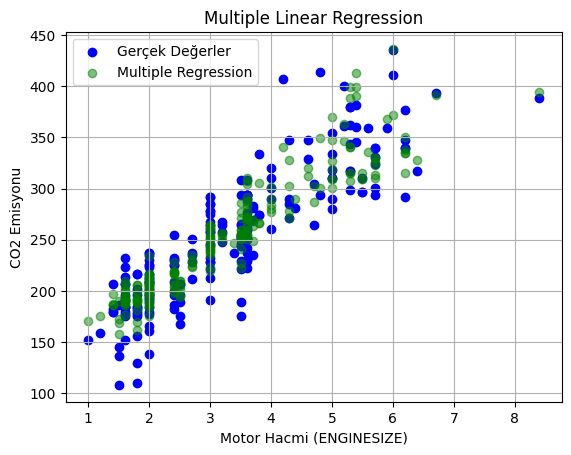

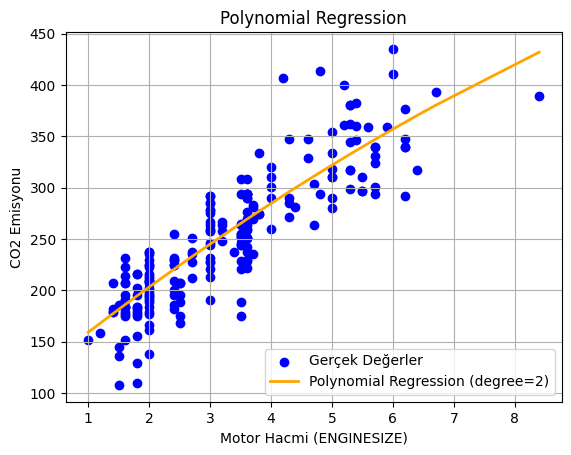

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Veriyi yükle
df = pd.read_csv( "/content/drive/My Drive/Colab Notebooks/FuelConsumptionCo2.csv")

# ===============================
# 1. Simple Linear Regression
# ===============================
X_simple = df[["ENGINESIZE"]]
y = df["CO2EMISSIONS"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)
y_pred_simple = simple_model.predict(X_test_s)

plt.scatter(X_test_s, y_test_s, color='blue', label='Gerçek Değerler')
plt.plot(X_test_s, y_pred_simple, color='red', linewidth=2, label='Simple Regression')
plt.xlabel("Motor Hacmi (ENGINESIZE)")
plt.ylabel("CO2 Emisyonu")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

# ===============================
# 2. Multiple Linear Regression
# ===============================
features = ["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]
X_multi = df[features]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)
y_pred_multi = multi_model.predict(X_test_m)

plt.scatter(X_test_m["ENGINESIZE"], y_test_m, color='blue', label='Gerçek Değerler')
plt.scatter(X_test_m["ENGINESIZE"], y_pred_multi, color='green', label='Multiple Regression', alpha=0.5)
plt.xlabel("Motor Hacmi (ENGINESIZE)")
plt.ylabel("CO2 Emisyonu")
plt.title("Multiple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

# ===============================
# 3. Polynomial (Nonlinear) Regression
# ===============================
X_poly = df[["ENGINESIZE"]]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_p, y_train_p)

X_test_sorted = X_test_p.sort_values(by="ENGINESIZE")
y_pred_poly = poly_model.predict(X_test_sorted)

plt.scatter(X_test_p, y_test_p, color='blue', label='Gerçek Değerler')
plt.plot(X_test_sorted, y_pred_poly, color='orange', linewidth=2, label='Polynomial Regression (degree=2)')
plt.xlabel("Motor Hacmi (ENGINESIZE)")
plt.ylabel("CO2 Emisyonu")
plt.title("Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
